<a href="https://colab.research.google.com/github/norrilsk/GraphCourse/blob/main/lectures/Graph_Course_lesson_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Алгоритмы на графах. Занятие № 8

https://portal.tpu.ru/SHARED/t/TRACEY/Courses/English/Tab1/graph_lec_05.pdf

##Определения

**Транспортная сеть** (flow network) $G = (V,E)$ представляет собой ориен-
тированный граф, в котором каждое ребро $(u, v) ∈ E$ имеет неотрицательную
**пропускную способность** (capacity) $c (u, v) > 0$. Если $(u, v) ∉
E$, предполагается, что $c (u, v) = 0$. В транспортной сети выделяются две вершины: **источник**
(source) $s$ и **сток** (sink) $t$.

для удобства будем предполагать, что граф связный

**Потоком** (flow) в $G$ является действительная функция $f : V × V → R$,
удовлетворяющая следующим трем условиям.
1. **Ограничение пропускной способности** (capacity constraint): $f (u, v) ≤ c (u, v)$
для всех $u, v ∈ V $.
2. **Антисимметричночть** (skew symmetry): $f (u, v) = −f (v, u)$ для всех $u, v ∈ V$
3. **Сохранение потока** (flow conservation): для всех $u ∈ V − \{s, t\}$
$$\sum_{v\in V}f(u,v)=0$$

Количество $f (u, v)$, которое может быть положительным, нулевым или отрицательным, называется **потоком** (flow) из вершины $u$ в вершину $v$. **Величина** (value)
потока $f$ определяется как
$$|f| = \sum_{v\in V}f(s,v)$$

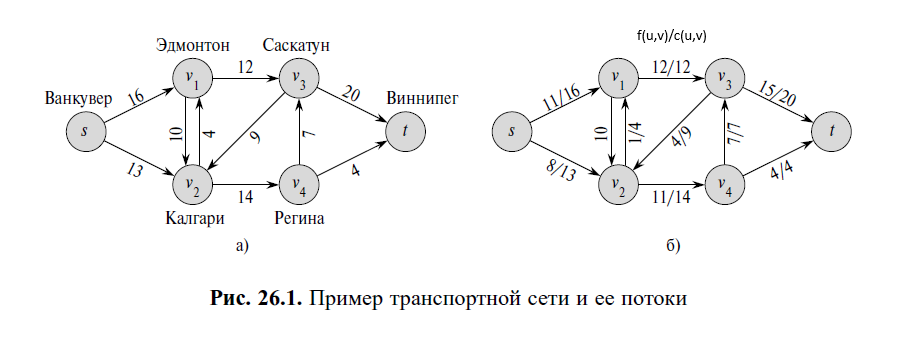

В **задаче о максимальном потоке** (maximum flow problem) дана некоторая транспортная сеть $G$
с источником $s$ и стоком $t$, и необходимо найти поток максимальной величины.

Задача определения максимального потока в сети с несколькими источниками и несколькими стоками сводится к обычной задаче о максимальном потоке.

Для этого добавляется **фиктивный источник** (supersource) s и ориентированные ребра $(s, s_i)$ с пропускной способностью c $(s, s_i) = ∞$ для каждого $i = 1, 2, . . . , m$.
Точно так же создается новый **фиктивный сток** (supresink) $t$ и добавляются ориентированные ребра $(t_i, t)$ с $c(t_i, t) = ∞$ для каждого $i = 1, 2, . . . , n$.

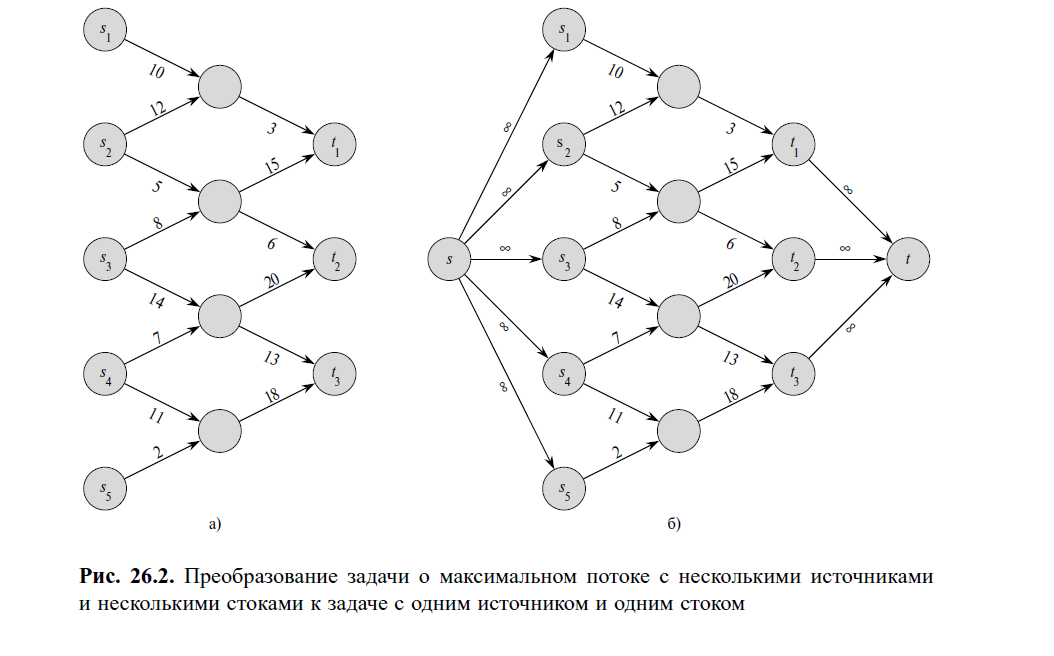

**Лемма 26.1.** Пусть $G = (V,E)$ — транспортная сеть, и $f$ — некоторый поток
в сети $G$. Тогда справедливы следующие равенства.
1. Для всех $X ⊆V f (X,X) = 0$.
2. Для всех $X, Y ⊆V \;f (X, Y ) = −f (Y,X)$.
3. Для всех$ X, Y,Z⊆V$ , таких что $X∩Y = ∅$, $f (X ∪ Y,Z) = f (X,Z)+f (Y,Z)$
и $f (Z,X ∪ Y ) = f (Z,X) + f (Z, Y )$.

## Метод Форда-Фалкерсона

$FORD\_FULKERSON\_METHOD(G, s, t)$<br>
$\quad $Задаем начальное значение потока $f$ равным $0$<br>
$\quad \textbf{while}\;$ (Пока) существует увеличивающий путь $p$<br>
$\quad \quad \textbf{do}\;$  увеличиваем поток $f$ вдоль пути $p$<br>
$\quad \textbf{return}\;$  $f$<br>

### Остаточные сети

Интуитивно понятно, что если заданы некоторая транспортная сеть и поток,
то остаточная сеть — это сеть, состоящая из ребер, допускающих увеличение
потока.

Пусть задана транспортная сеть $G = (V,E)$ с источником
$s$ и стоком $t$. Пусть $f$ — некоторый поток в $G$. Рассмотрим пару вершин $u, v ∈ V$ . Величина дополнительного потока, который мы можем направить из $u$ в $v$,
не превысив пропускную способность c $(u, v)$, является **остаточной пропускной
способностью** (residual capacity) ребра $(u, v)$, и задается формулой
$$c_f(u,v) = c(u,v) - f(u,v)$$

Для заданной транспортной сети $G = (V,E)$ и потока $f$, **остаточной сетью**
(residual network) в $G$, порожденной потоком $f$, является сеть $G_f = (V,E_f )$, где
$$E_f = \{(u, v) ∈ V × V : c_f (u, v) > 0\} $$

По каждому **остаточному ребру** (residual edge), можно направить поток, больший 0.

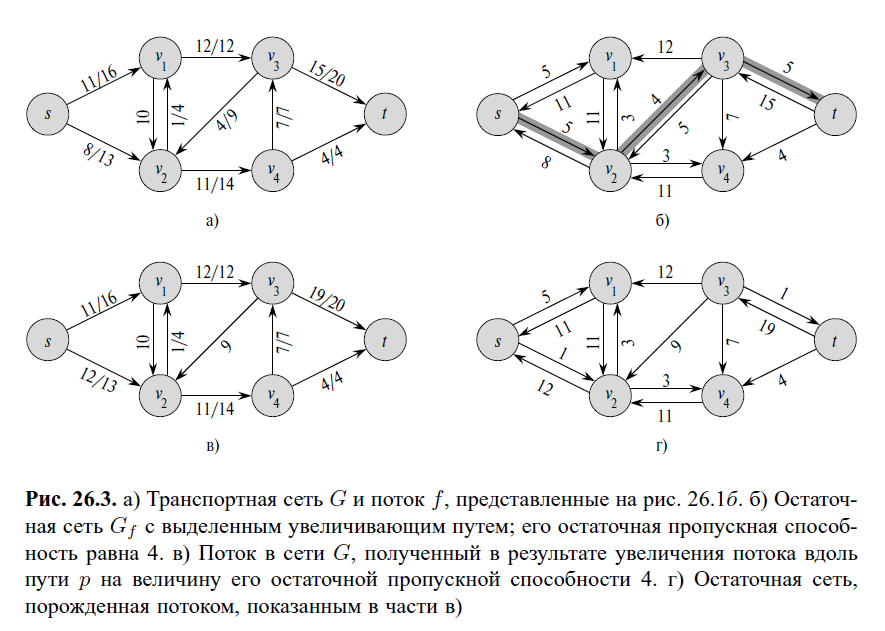

Пусть дана транспортная сеть $G = (V,E)$, и п усть $f_1 и f_2$ — функции,
отображающие $V × V$ в $R$. **Суммой потоков** $f_1 + f_2$ является функция отображающая $V × V$ в $R$ и определяемая как
$$(f_1 + f_2) (u, v) = f_1 (u, v) + f_2 (u, v)$$

**Лемма 26.2.** Пусть $G = (V,E)$ — транспортная сеть с источником $s$ и стоком $t$,
а $f$ — поток в $G$. Пусть $G_f$ — остаточная сеть в $G$, порожденная потоком $f$, а $f'$ —поток в $G_f$ . Тогда сумма потоков $f +f'$ является
потоком в $G$, и величина этого потока равна $|f + f'| = |f| + |f'|$.

<details>
<summary>Доказательство</summary>
Необходимо проверить, выполняются ли ограничения антисимметричности, пропускной способности и сохранения потока. Для подтверждения
антисимметричности заметим, что для всех $u, v ∈ V$ , справедливо

$$(f +f')(u,v) = f(u,v)+f'(u,v)= $$
$$\quad\quad\quad\quad\quad\quad\;\;= -f(v,u)-f'(v,u)= $$
$$\quad\quad\quad\quad\quad\quad\quad\;= -(f(v,u)+f'(v,u))= $$
$$\quad\quad\quad\quad\quad= -(f+f')(v,u)= $$

Покажем соблюдение ограничений пропускной способности. Заметим, что
$f' (u, v) \le c_f (u, v)$ для всех $u, v ∈ V$ . Поэтому, согласно уравнению
$$c_f(u,v) = c(u,v) - f(u,v)$$

$$(f +f')(u,v) = f(u,v)+f'(u,v)\le $$
$$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\le f(u,v)+(c(u,v) - f(u,v))= $$
$$\;\;=c(u,v) $$
Что касается сохранения потока, заметим, что для всех $u∈V −\{s, t\}$ справедливо
равенство
$$\sum_{v\in V}(f+f')(u,v) = \sum_{v\in V}(f(u,v)+f'(u,v))=$$
$$\phantom{\sum_{v\in V}(f+f')(u,v)}\;\;\;\; = \sum_{v\in V}f(u,v)+\sum_{v\in V}f'(u,v)=$$
$$\;\;\;\; =0 +0+0$$

Наконец
$$|f+f'| = \sum_{v \in V}(f+f')(s,v)=$$
$$\phantom{|f+f'|}\quad\quad\; = \sum_{v \in V}(f(s,v)+f'(s,v))=$$
$$\phantom{|f+f'|}\quad\quad\;=\sum_{v \in V}f(s,v) + \sum_{v \in V}f'(s,v)$$
$$=|f+f'|\;\;\;\;\;$$
&emsp;
</details>


### Увеличивающие Пути

**Лемма 26.3.** Пусть $G = (V,E)$ — транспортная сеть, а $f$ — некоторый поток
в $G$, и п усть $p$ — некоторый увеличивающий путь в $G_f$ . Определим функцию
$f_p : V × V → R$ следующим образом:
\begin{equation}
  f_{p}(u,v) =
    \begin{cases}
      c_f(p) & \text{если $(u, v)$ принадлежит $p$}\\
      -c_f(p) & \text{если $(v, u)$ принадлежит $p$}\\
      0 & \text{в противном случае.}
    \end{cases}       
\end{equation}
Тогда $f_p$ является потоком в $G$ и его величина составляет $|f_p| = c_f (p) > 0$.

**Следствие 26.4.** Пусть $G = (V,E)$ — транспортная сеть, а $f$ — некоторый поток
в $G$, и пусть $p$ — некоторый увеличивающий путь в $G_f$. Пусть $f_p$ определен
в соответствии с леммой 26.2 $⇑$. Определим функцию $f' : V × V → R$ как
$f' = f +f_p$. Тогда $f'$ является потоком в $G$ и имеет величину $|f'| = |f|+|f_p| > |f|$.

###Разрезы транспортных сетей

**Разрезом** (cut) $(S, T)$ транспортной сети $G = (V,E)$ называется разбиение
множества вершин на множества $S$ и $T = V − S$, такие что $s ∈ S$, а $t ∈ T$.

Если $f$ — поток, то **чистый поток** (net flow) через разрез $(S, T) $по
определению равен $f (S, T)$.

**Пропускной способностью** (capacity) разреза $(S, T)$
является $c (S, T)$.

**Минимальным разрезом** (minimum cut) сети является разрез,
пропускная способность которого среди всех разрезов сети минимальна.

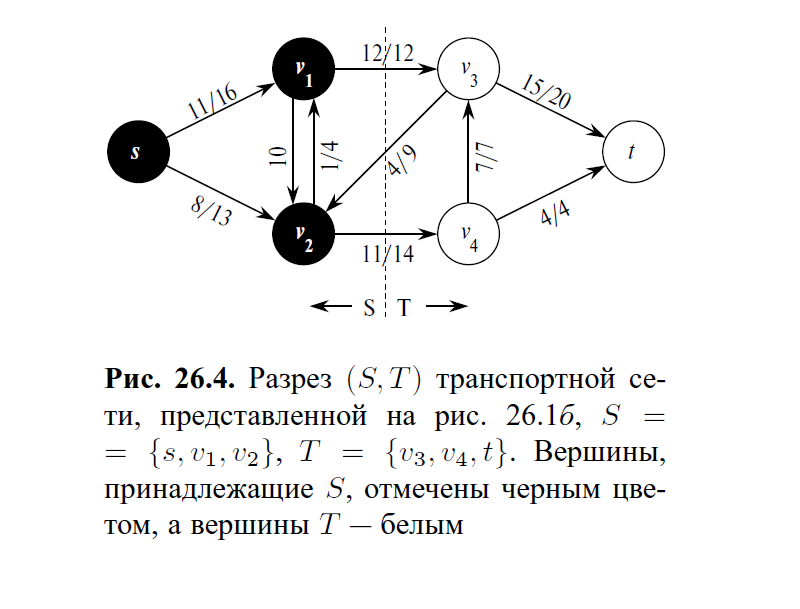

Чистый поток через данный разрез равен
$$f (v_1, v_3) + f (v_2, v_3) + f (v_2, v_4) = 12+(−4) + 11 = 19$$
а пропускная способность этого разреза равна
$$c (v_1, v_3) + c (v_2, v_4) = 12 + 14 = 26$$

Обратите внимание, что чистый поток через разрез может включать в себя
отрицательные потоки между вершинами, но пропускная способность разреза
слагается исключительно из неотрицательных значений

**Лемма 26.5.** Пусть $f$ — некоторый поток в транспортной сети $G$ с источником
$s$ и стоком $t$, и пусть $(S, T)$ — разрез $G$. Тогда чистый поток через $(S, T)$ равен
$f (S, T) = |f|$.

<details>
<summary>Доказательство</summary>
Заметим, что согласно свойству сохранения потока $f(S − s,
V ) = 0$, так что
\begin{align*}
f (S, T) &= f (S, V ) − f (S, S) = \text{(согласно лемме 26.1, часть (3))}\\
&= f (S, V ) = \text{(согласно лемме 26.1, часть (1))}\\
&= f (s, V ) + f (S − s, V ) = \text{(согласно лемме 26.1, часть (3))}\\
&= f (s, V ) = (\text{поскольку} f (S − s, V ) = 0)\\
&= |f| .
\end{align*}
&emsp;
</details>



**Следствие 26.6**. Величина любого потока $f$ в транспортной сети $G$ не превышает
пропускную способность произвольного разреза $G$.

<details>
<summary>Доказательство</summary>
Пусть $(S, T)$ — произвольный разрез $G$, а $f$ — некоторый поток.
Согласно лемме 26.5 и ограничениям пропускной способности,
$$|f| = f(S,T) =\sum_{u\in S}\sum_{v \in T}f(u,v) \le \sum_{u\in S}\sum_{v \in T}c(u,v) = c (S,T) $$
&emsp;
</details>


**Непосредственно из следствия 26.6 вытекает, что максимальный поток в сети
не превышает пропускной способности минимального разреза.**

**Теорема 26.7 (О максимальном потоке и минимальном разрезе)**. Если $f$ —некоторый поток в транспортной сети $G = (V,E)$ с источником $s$ и стоком $t$, то
следующие утверждения эквивалентны.
1. $f$ — максимальный поток в $G$.
2. Остаточная сеть $G_f$ не содержит увеличивающих путей.
3. $|f| = c (S, T)$ для некоторого разреза $(S, T)$ сети $G$.

<details>
<summary>Доказательство</summary>

$(1) ⇒ (2)$: Предположим противное:

Пусть $f$ является максимальным потоком в $G$, но $G_f$ содержит увеличивающий путь $p$.

Согласно следствию 26.4, сумма потоков $f + f_p$, где $f_p$ задается уравнением \begin{equation}
  f_{p}(u,v) =
    \begin{cases}
      c_f(p) & \text{если $(u, v)$ принадлежит $p$}\\
      -c_f(p) & \text{если $(v, u)$ принадлежит $p$}\\
      0 & \text{в противном случае.}
    \end{cases}       
\end{equation}
является
потоком в $G$, величина которого строго больше, чем $|f|$, что противоречит предположению, что $f$ — максимальный поток.


$(2) ⇒ (3)$: Предположим, что $G_f$ не содержит увеличивающего пути, т.е. $G_f$
не содержит пути из $s$ в $t$.

Определим
$$S = \{v ∈ V : \;в \;G_f\;существует\; путь \;из\; s \;в \;v\}$$
и $T = V − S$.

Разбиение $(S, T)$ является разрезом: очевидно, что $s ∈ S$, а $t ∉ S$,
поскольку в $G_f$ не существует пути из $s$ в $t$.

Для каждой пары вершин $u ∈
 S, v ∈ T$ справедливо соотношение $f (u, v) = c (u, v)$, поскольку в противном
случае $(u, v)∈E_f$ и $v$ следует поместить во множество $S$. Следовательно, согласно
лемме 26.5, $$|f| = f (S, T) = c (S, T)$$


$(3) ⇒ (1)$: Согласно следствию 26.6, $|f| \le c (S, T)$ для всех разрезов $(S, T)$,
поэтому из условия $|f| = c (S, T)$ следует, что $f$ — максимальный поток.
&emsp;
</details>


## Алгоритм Форда-Фалкерсона

$FORD\_FULKERSON(G, s, t)$<br>
$\quad \textbf{for}\;$ (для) каждого ребра $(u, v) ∈ E[G]$<br>
$\quad \quad \textbf{do}\; f[u, v] ← 0$<br>
$\quad \quad \quad \;\;f[v, u] ← 0$<br>
$\quad \textbf{while}\;$ существует путь $p$ из $s$ в $t$ в остаточной сети $G_f$<br>
$\quad \textbf{do}\; c_f (p) ← min \{c_f (u, v) : (u, v)$ принадлежит $p\}$<br>
$\quad \quad \textbf{for}\;$ (для) каждого ребра $(u, v)$ in $p$<br>
$\quad \quad \quad \textbf{do}\; f[u, v] ← f[u, v] + cf (p)$<br>
$\quad \quad \quad \quad \;\;f[v, u]←−f[u, v]$<br>

Сложность
$FORD\_FULKERSON(G, s, t)$<br>
$\quad \textbf{for}\;$ (для) каждого ребра $(u, v) ∈ E[G]$ // $O(E)$<br>
$\quad \quad \textbf{do}\; f[u, v] ← 0$<br>
$\quad \quad \quad \;\;f[v, u] ← 0$<br>
$\quad \textbf{while}\;$ существует путь $p$ из $s$ в $t$ в остаточной сети $G_f$ // поиск пути - поиск в ширину $O(V+E) = O(E)$ итераций не больше чем $O(|f*|)$ - каждый раз мы увеличиваем величину потока хотя бы на 1<br>
$\quad \quad \textbf{do}\; c_f (p) ← min \{c_f (u, v) : (u, v)$ принадлежит $p\}$<br>
$\quad \quad \quad \textbf{for}\;$ (для) каждого ребра $(u, v)$ in $p$<br>
$\quad \quad \quad \quad \textbf{do}\; f[u, v] ← f[u, v] + cf (p)$<br>
$\quad \quad \quad \quad \quad \;\;f[v, u]←−f[u, v]$<br>

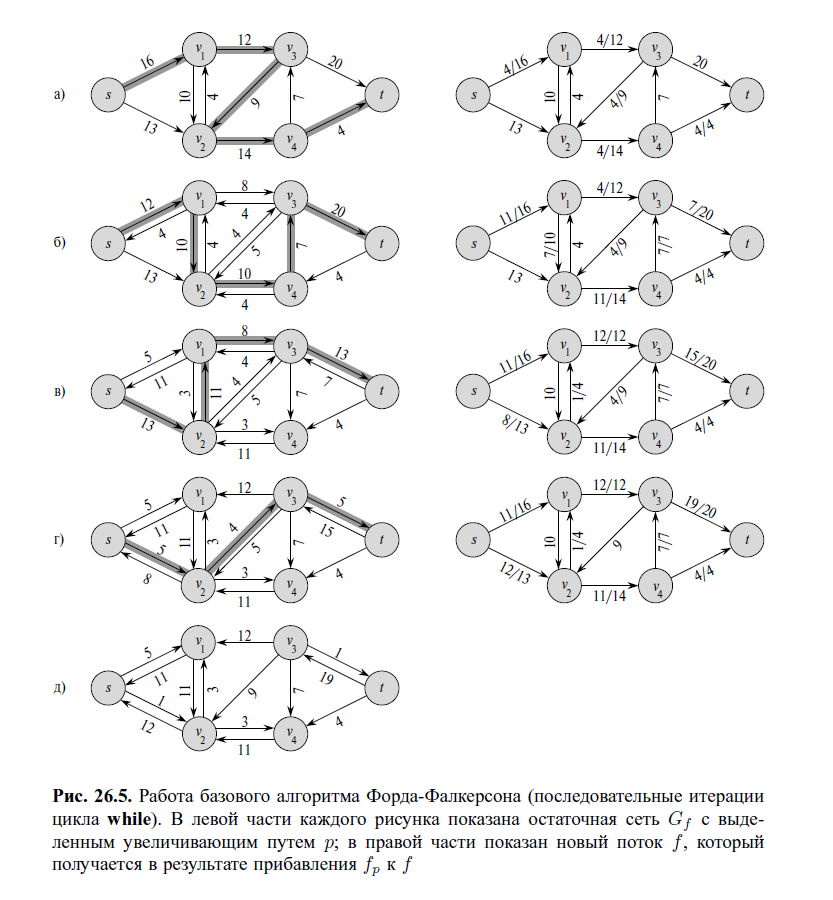

проблемный случай


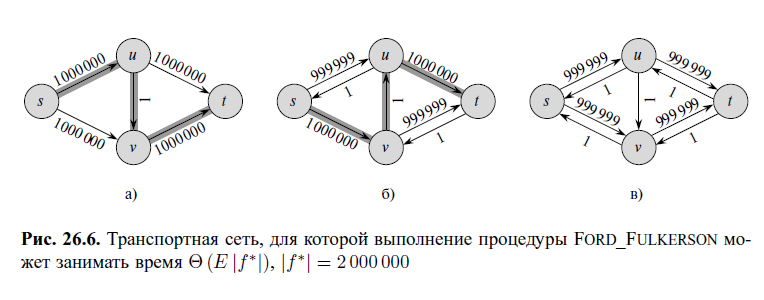

## Алгоритм Эдмондса-Карпа

**(у нас очевидно не будет времени все это доказывать, номерация по Кормену, если указана)**

Указанный недостаток метода Форда-Фалкерсона можно преодолеть, если реализовать вычисление увеличивающего пути $p$ как поиск в ширину,
и если в качестве увеличивающего пути выбирается **кратчайший путь** из $s$
в $t$ в остаточной сети, где каждое ребро имеет единичную длину

**Лемма 26.8.** Если для некоторой транспортной сети $G = (V,E)$ с источником
$s$ и стоком $t$ выполняется алгоритм Эдмондса-Карпа, то для всех вершин $v ∈
 V − \{s, t\}$ длина кратчайшего пути $δ_f (s, v)$ в остаточной сети $G_f$ монотонно
возрастает с каждым увеличением потока.

**Теорема 26.9.** Если для некоторой транспортной сети $G = (V,E)$ с источником
$s$ и стоком $t$ выполняется алгоритм Эдмондса-Карпа, то общее число увеличений
потока, выполняемое данным алгоритмам, составляет $O (V E)$.

Если увеличивающий путь находится посредством поиска в ширину, каждую
итерацию процедуры $FORD\_FULKERSON$ можно выполнить за время $O (E)$, сле-
довательно, суммарное время выполнения алгоритма Эдмондса-Карпа составляет
$O(
V E^2)$
.

## Поиск потока минимальной стоимости

Пусть дана сеть $G(V,E)
. S,T∈V$
 — источник и сток. Ребра $(u,v)∈E$
 имееют пропускную способность $c(u,v)$,
 поток $f(u,v)$
 и цену за единицу потока $a(u,v)$
. Тогда общая стоимость потока из $S$
 в $T$
:
$$p(u,v)=\sum_{u,v∈V,f(u,v)>0}a(u,v)⋅f(u,v)$$

**Теорема** Пусть: $G$
 — сеть с истоком $s$
 и стоком $t$
, $f$
 — поток минимальной стоимости в сети $G$
 среди потоков величины a
, $P$
 — путь минимальной стоимости $s⇝t$
 в остаточной сети.
Тогда:

$∀δ:0⩽δ⩽c_f(P)$
 поток $f+δ⋅f_P$
 — поток минимальной стоимости среди потоков величины $a+δ$
, где $δ⋅f_P$
 — поток величины $δ$
, проходящий по пути $P$


<details>
<summary>Ссылка</summary>
https://neerc.ifmo.ru/wiki/index.php?title=%D0%9F%D0%BE%D0%B8%D1%81%D0%BA_%D0%BF%D0%BE%D1%82%D0%BE%D0%BA%D0%B0_%D0%BC%D0%B8%D0%BD%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9_%D1%81%D1%82%D0%BE%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D0%B8_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%BE%D0%BC_%D0%B4%D0%BE%D0%BF%D0%BE%D0%BB%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B2%D0%B4%D0%BE%D0%BB%D1%8C_%D0%BF%D1%83%D1%82%D0%B5%D0%B9_%D0%BC%D0%B8%D0%BD%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9_%D1%81%D1%82%D0%BE%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D0%B8
&emsp;
</details>


$FORD\_FULKERSON'(G, s, t)$<br>
$\quad \textbf{for}\;$ (для) каждого ребра $(u, v) ∈ E[G]$<br>
$\quad \quad \textbf{do}\; f[u, v] ← 0$<br>
$\quad \quad \quad \;\;f[v, u] ← 0$<br>
$\quad \textbf{while}\;$ существует путь $P$ из $s$ в $t$ в остаточной сети $G_f$<br>
$\quad \textbf{do}\;$ найдем $P$ - путь минимальной стоиомости из $s$ в $t$<br>
$\quad \quad c_f (P) ← min \{c_f (u, v) : (u, v)$ принадлежит $P\}$<br>
$\quad \quad \textbf{for}\;$ (для) каждого ребра $(u, v)$ in $p$<br>
$\quad \quad \quad \textbf{do}\; f[u, v] ← f[u, v] + cf (P)$<br>
$\quad \quad \quad \quad \;\;f[v, u]←−f[u, v]$<br>

сложность $O(F(V,E)⋅|f|)$ - где $F(V,E)$ - сложность поиска кратчайшего пути
